In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_88267/781345070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../data/marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.shape

(2240, 29)

# Easy

In [5]:
sum(df['Complain']) # кол-во жалоб

21

In [6]:
df_customers = df[(df['MntFishProducts'] > 0) | (df['MntMeatProducts'] > 0) | (df['MntSweetProducts'] > 0) | (df['MntFruits'] > 0) | (df['MntWines'] > 0) | (df['MntGoldProds'] > 0)]
df_customers["Age"] = 2024 - df_customers["Year_Birth"]
df_customers["Age"].mean() # средний возраст покупателей

55.19419642857143

In [7]:
df["Age"] = 2024 - df["Year_Birth"]
df["Age"].mean() # средний возраст всех людей в датасете

55.19419642857143

Средний возраст покупателей и всех людей в датасете одинаковый

# Medium

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- Age

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

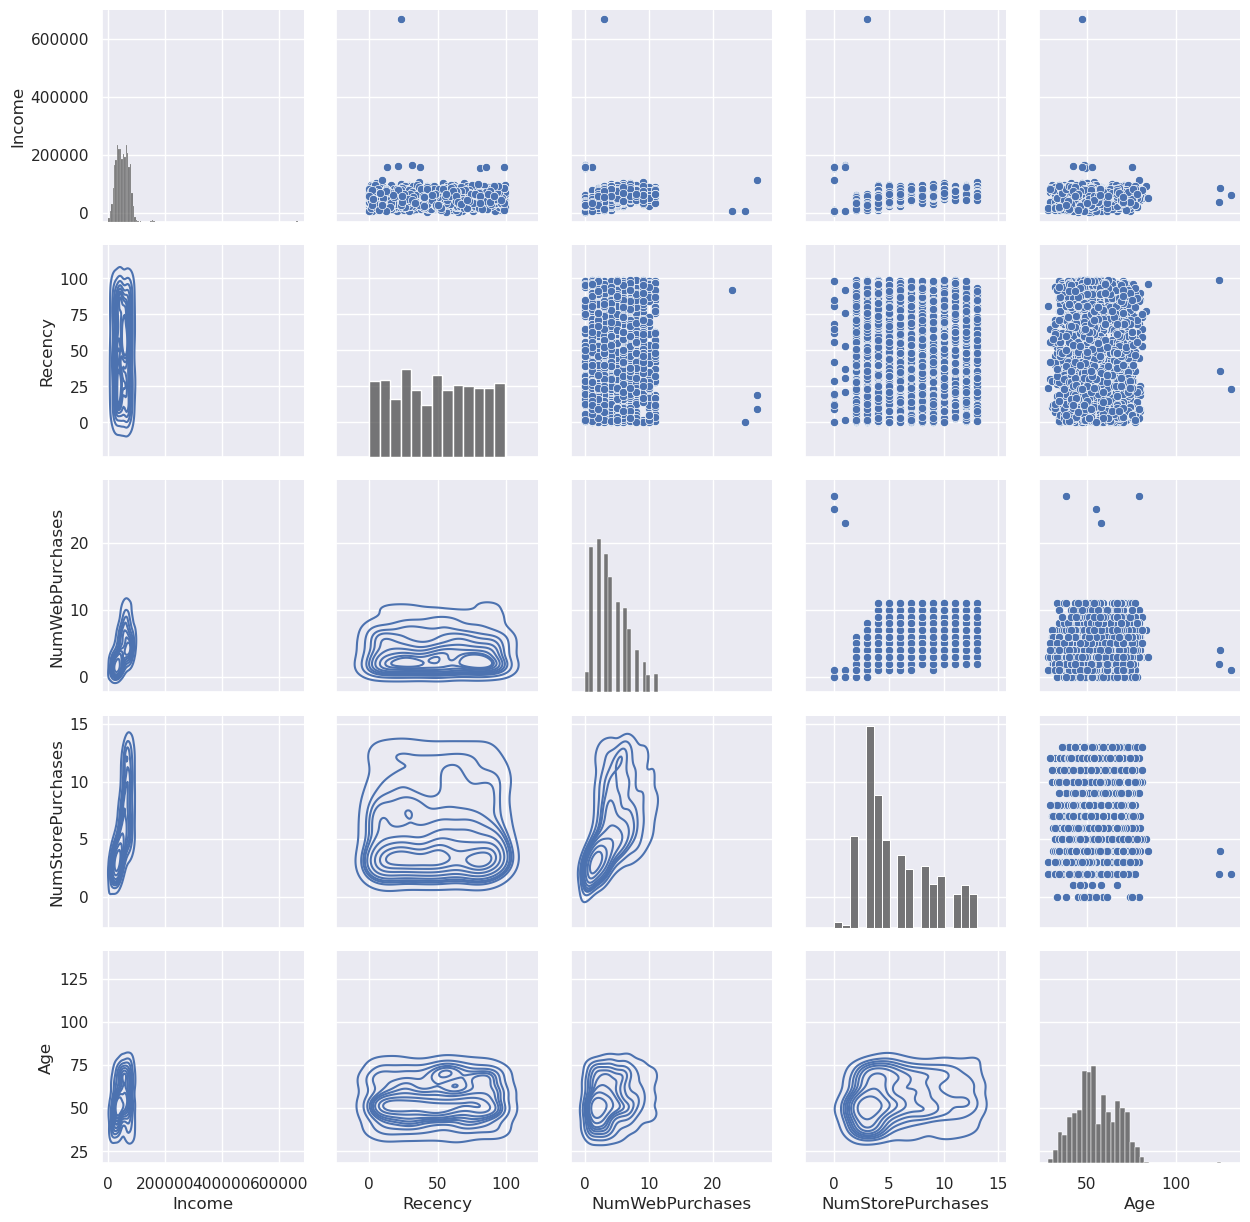

In [9]:
variables = ['Income', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Age']
g = sns.PairGrid(df, vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

Представленные на графиках фичи не зависят линейно друг от друга. Большая часть людей в датасете среднего возраста. Есть выбросы в виде людей старше 100 лет и дохода выше 400000.

Можно заметить, что те кто покупают часто - покупают не очень много (0-10 покупок) в интернет-магазине и больше (от 5 до 15) в оффлайн-магазине, причем по оффлайн-покупкам расслоение больше. В целом в датасете большая часть людей не очень много покупала (<5 раз). Связи между онлайн и оффлайн покупками нет, кроме того факта, что те, кто покупал <5 раз онлайн, покупал мало и оффлайн тоже (и наоборот).

Больше зарабатывают те, кто старше. Часто и много покупают и люди с высокой зарплатой, и с низкой, возможно есть какая-то слабая корреляция, но сказать сложно из-за обилия данных и того факта, что в основном в датасете люди среднего возраста, которые относительно много зарабатывают. 

Попробуем убрать выбросы и проанализировать подробнее.

In [10]:
df[df['Income'] > 400000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,3,11,0,47


In [11]:
df[df['Age'] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,124
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,131
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,125


In [12]:
df_clean = df.drop(labels=[192, 239, 339, 2233])
df_clean[df_clean['Income'] > 400000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age


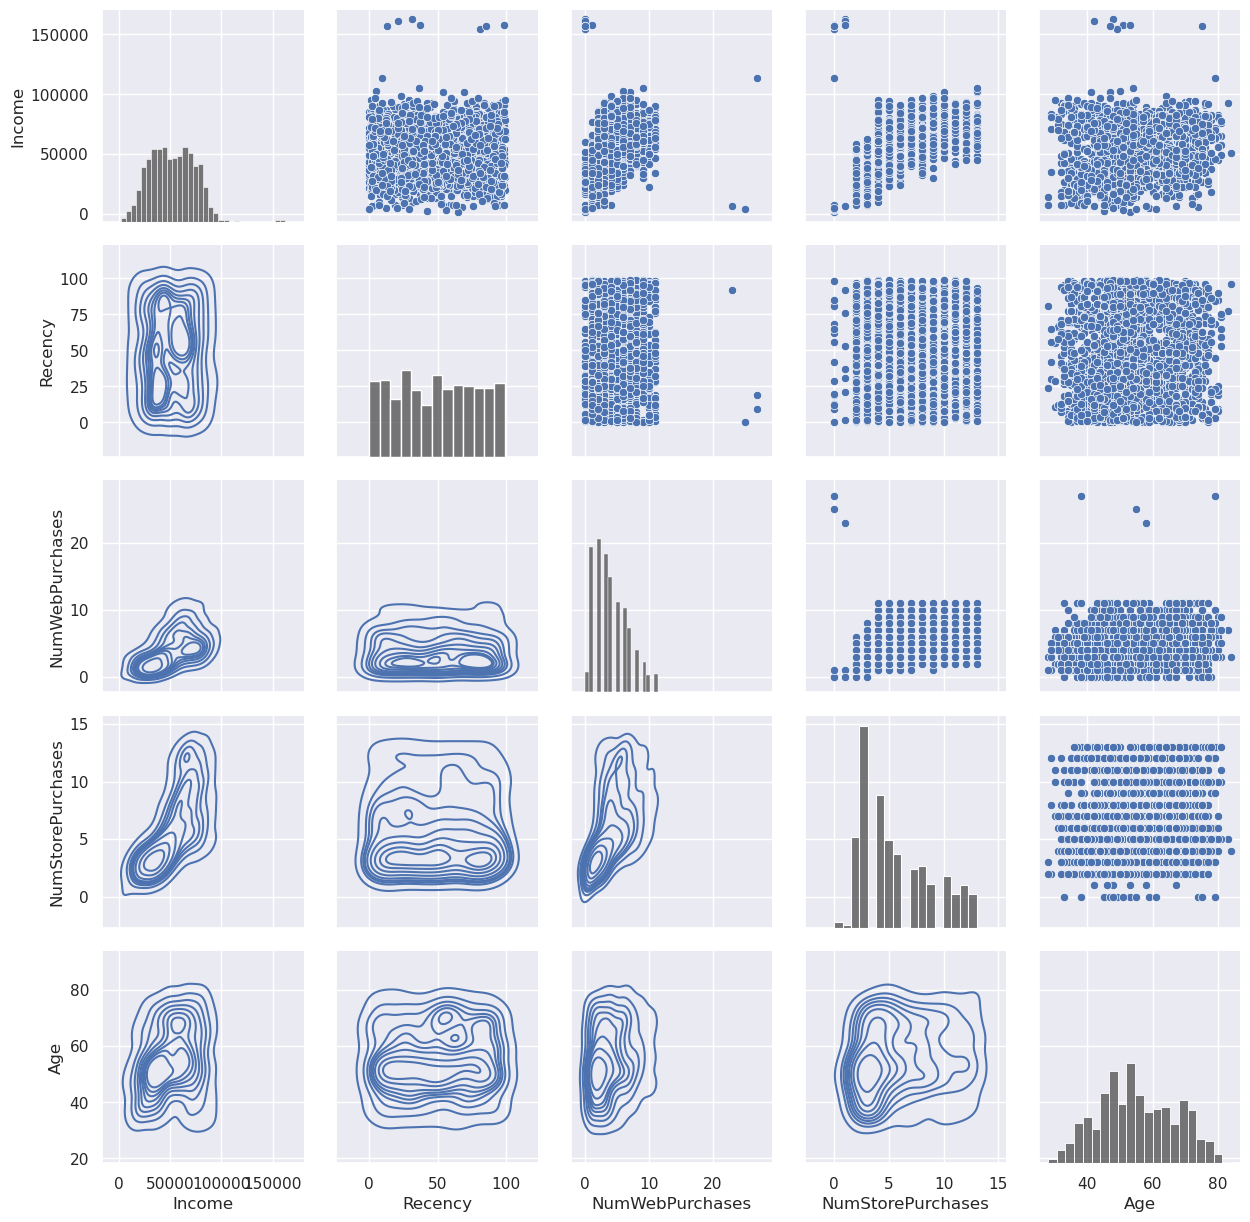

In [13]:
variables = ['Income', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Age']
g = sns.PairGrid(df_clean, vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

Большая часть людей в датасете зарабатывает около 50000. Действительно, и оффлай, и онлайн больше покупали люди с более высоким доходом. С Recency и доходом особой корреляции нет.

С количеством покупок и частотой тоже нет особой корреляции, но посмотрим на всякий случай на более крупном графике.

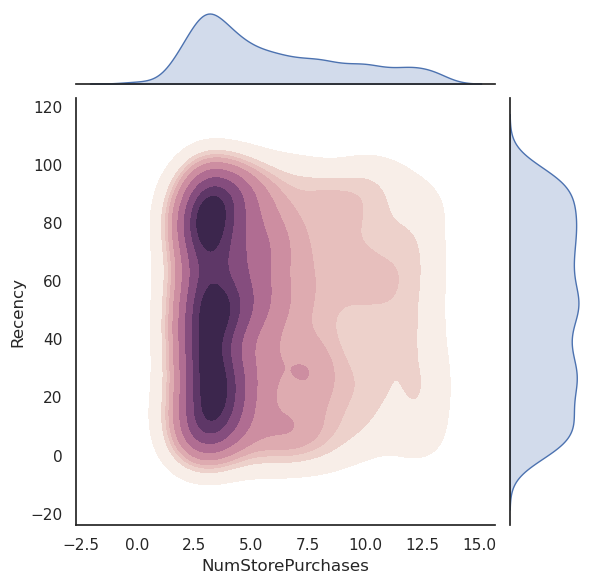

In [14]:
sns.set_theme(style="white")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.jointplot(data=df_clean, 
              x="NumStorePurchases", 
              y="Recency", 
              cmap=cmap, fill=True,
              kind="kde")

Видим, что большая часть людей покупают не очень часто и не очень много. Те кто покупают много, покупают реже.

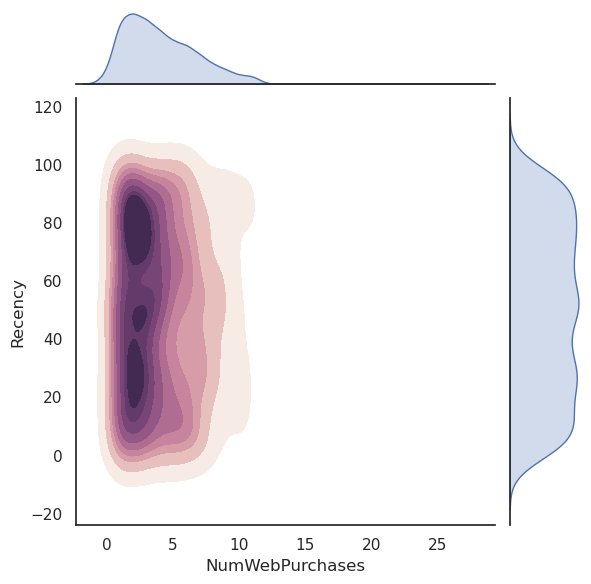

In [15]:
sns.set_theme(style="white")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.jointplot(data=df_clean, 
              x="NumWebPurchases", 
              y="Recency", 
              cmap=cmap, fill=True,
              kind="kde")

Тут можно придти к тем же выводам, что и с предыдущим графиком

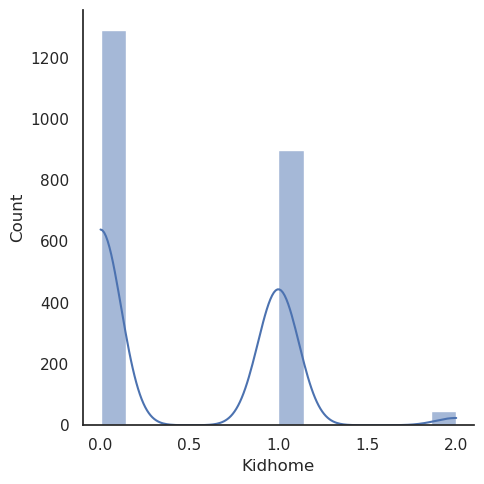

In [16]:
sns.displot(data=df_clean, x='Kidhome', kde=True)

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


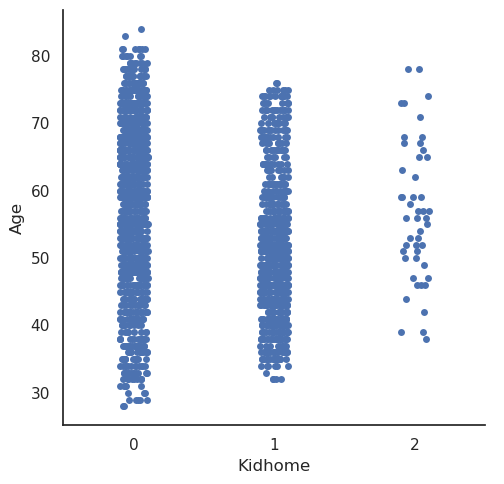

In [17]:
sns.catplot(data=df_clean, x="Kidhome", y="Age")

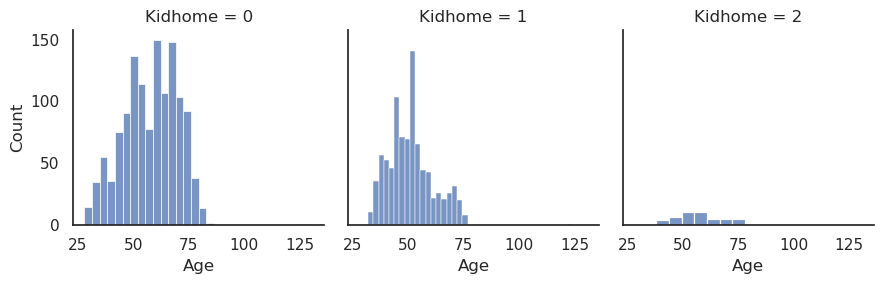

In [18]:
g = sns.FacetGrid(df, col="Kidhome")
g.map(sns.histplot, "Age")

Можно заметить, что у большинства людей нет детей или есть 1 ребенок. Особой корреляции не наблюдается.

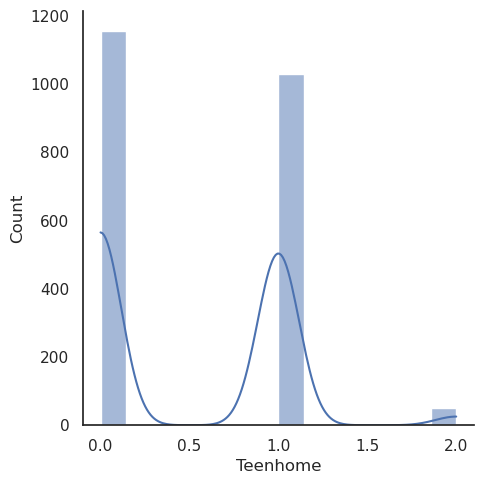

In [19]:
sns.displot(data=df_clean, x='Teenhome', kde=True)

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


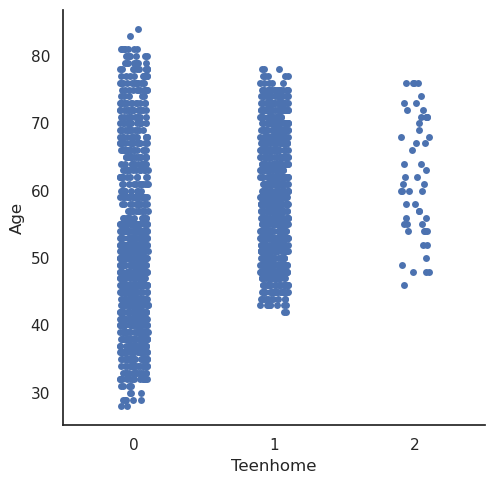

In [20]:
sns.catplot(data=df_clean, x="Teenhome", y="Age")

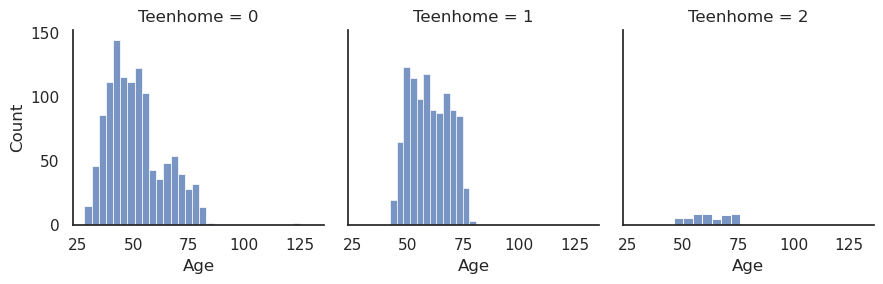

In [21]:
g = sns.FacetGrid(df, col="Teenhome")
g.map(sns.histplot, "Age")

Можно заметить, что у большинства людей нет детей-подростков или есть 1 подросток и что дети-подростки есть только. Особой корреляции не наблюдается.

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


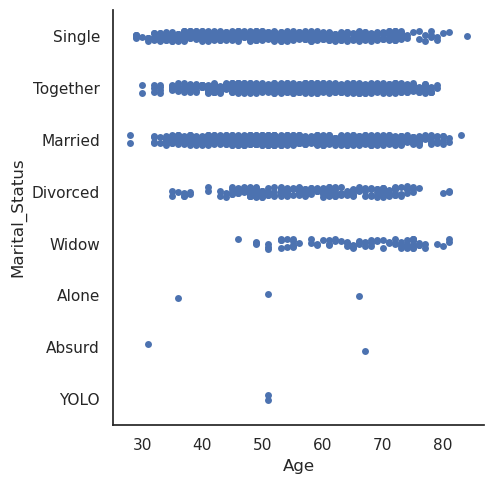

In [22]:
sns.catplot(data=df_clean, x="Age", y="Marital_Status")

Большая часть людей в колонке Marital_Status имеют Single, Together, Married или Divorced. Старшая часть людей из таблицы имеют статус Divorced или Widow. Absurd и YOLO можно считать выбросами. Наблюдается линейная зависимость.

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


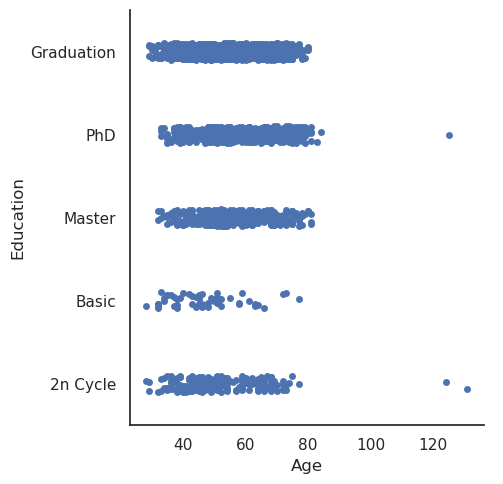

In [23]:
sns.catplot(data=df, x="Age", y="Education")

Большая часть людей в колонке Education имеют статус Graduation. С повышением возраста увеличивается доля людей со статусом Phd и Master. Наблюдается линейная зависимость уровня образования от возраста.

# Hard

Чтобы понять, кто целевая аудитория магазина, надо понять, какая категория населения больше всего и чаще всего покупает. Для этого надо посмотреть на графики и/или провести какие-то подсчеты, чтобы определить критерии ца. 

Учитывая предыдущий анализ, можно придти к выводу, что оффлайн и онлайн покупают примерно одинаково. Есть еще столбик с покупками через каталог. Посмотрим на него.

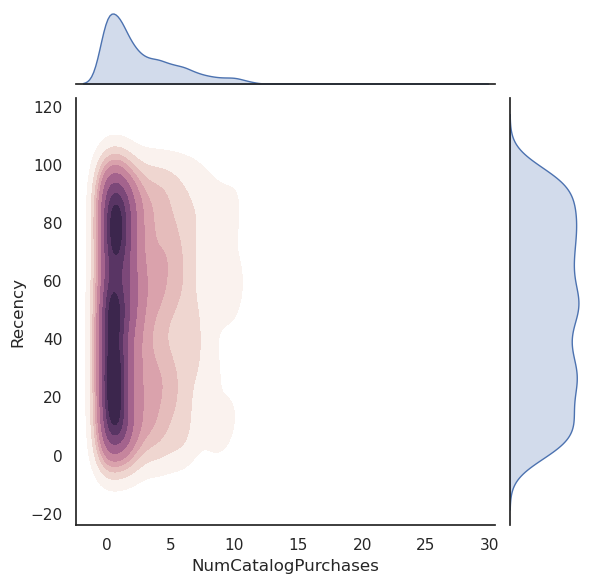

In [24]:
sns.set_theme(style="white")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.jointplot(data=df_clean, 
              x="NumCatalogPurchases", 
              y="Recency", 
              cmap=cmap, fill=True,
              kind="kde")

Тут наблюдаем примерно то же самое, что и с покупками онлайн и оффлайн. 

Посмотрим среднюю разницу между онлайн и оффлайн покупками.

In [25]:
abs(df['NumStorePurchases'] - df['NumWebPurchases']).mean()

2.4883928571428573

Разница небольшая. Посмотрим на средние разницы с покупками через каталог.

In [26]:
abs(df['NumStorePurchases'] - df['NumCatalogPurchases']).mean()

3.645982142857143

In [27]:
abs(df['NumCatalogPurchases'] - df['NumWebPurchases']).mean()

2.5120535714285714

Тоже небольшие. Сложим все покупки для каждого пользователя.

In [28]:
df_analysis = df
df_analysis['NumPurchases'] = df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [29]:
df_analysis[df_analysis['NumPurchases'] == 0] # те, кто ничего не покупал

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,NumPurchases
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,3,11,0,49,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,...,0,0,0,0,0,3,11,0,59,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0,0,0,0,0,3,11,0,51,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,3,11,0,75,0


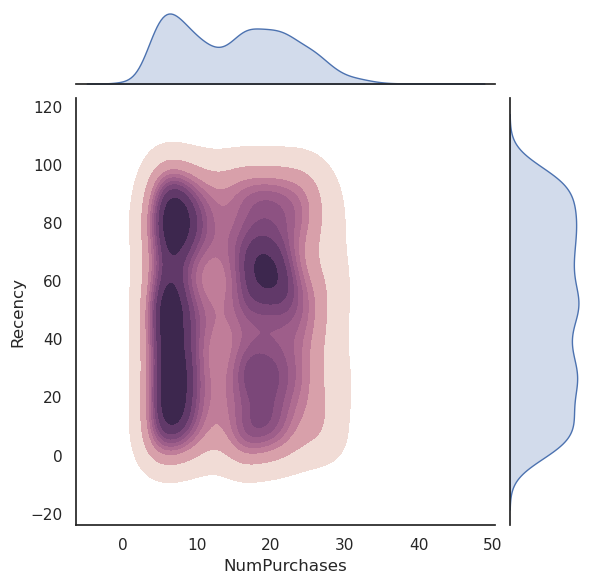

In [30]:
sns.set_theme(style="white")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.jointplot(data=df_analysis, 
              x="NumPurchases", 
              y="Recency", 
              cmap=cmap, fill=True,
              kind="kde")

Очень похоже на графики до того, как сложили все покупки в один столбик, но, кажется, теперь увеличилось среднее.

В датасете есть данные про количество потраченных денег на разные категории товаров. Мы не хотим анализировать затраты в зависимости от категории, поэтому можем просто сложить эти столбики, как поступили с количеством покупок. 

In [31]:
df_analysis['MntProducts'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntGoldProds'] + df['MntWines'] 

In [32]:
df_analysis[df_analysis['MntProducts'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,NumPurchases,MntProducts


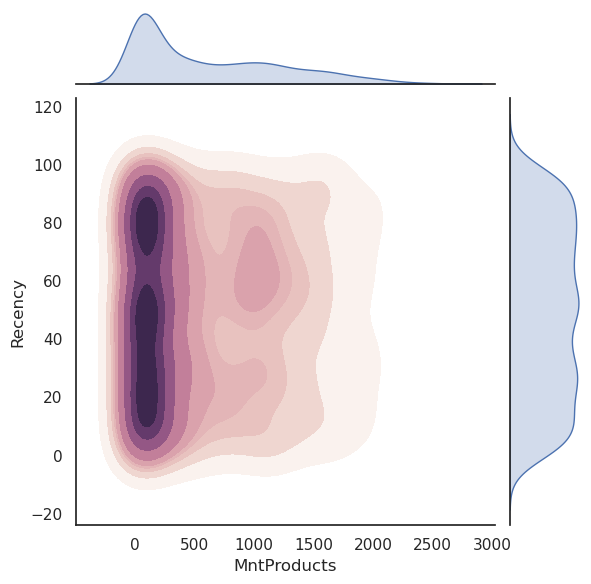

In [33]:
sns.set_theme(style="white")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.jointplot(data=df_analysis, 
              x="MntProducts", 
              y="Recency", 
              cmap=cmap, fill=True,
              kind="kde")

In [34]:
df_analysis.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'NumPurchases', 'MntProducts'],
      dtype='object')

In [35]:
to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Response',
          'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Z_CostContact', 'Z_Revenue', 'Complain']

In [36]:
df_analysis = df_analysis.drop(columns=to_drop, index=list(df_analysis[df_analysis['NumPurchases'] == 0].index)) # удаляем ненужные колонки
df_analysis.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumWebVisitsMonth,Age,NumPurchases,MntProducts
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,7,67,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,5,70,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,4,59,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,6,40,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,5,43,19,422


In [37]:
df_analysis.shape

(2236, 13)

Целевую аудиторию будем определять с помощью метрики, где за принесенную прибыль и частоту покупок будем начислять покупателю баллы.

Глобально прибыль для магазина важнее, поэтому ей присвоим больший коэффициент. 

Recency примерно одинаково распределена для всех покупателей, поэтому у нее будет наименьший коэффициент.

NumWebVisitsMonth так же не очень влияет, присвоим ей такой же коэффициент, как и Recency.

Перед тем, как это считать, надо нормировать данные. На среднее влияют выбросы, поэтому отнормируем на медиану.

In [38]:
df_analysis['Rating'] = (0.5 * (df_analysis['NumPurchases'] / df_analysis['NumPurchases'].median())
                    + 0.6 * (df_analysis['MntProducts'] / df_analysis['MntProducts'].median())
                    + 0.20 * (df_analysis['Recency'] / df_analysis['Recency'].median())
                    + 0.20 * (df_analysis['NumWebVisitsMonth'] / df_analysis['NumWebVisitsMonth'].median()))

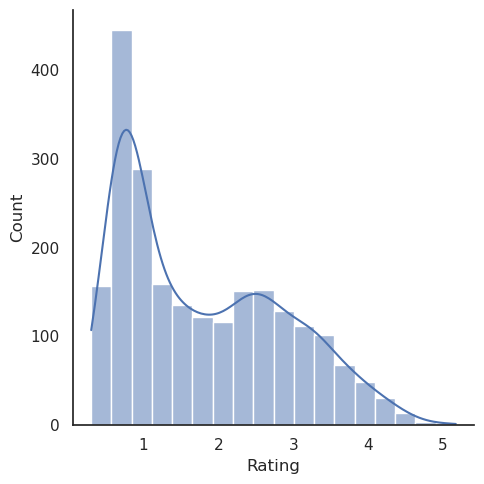

In [39]:
sns.displot(data=df_analysis, x='Rating', kde=True)

In [40]:
len(df_analysis[df_analysis['Rating'] >= 1.5]) / len(df_analysis) # доля тех, у кого рейтинг выше медианного

0.5067084078711985

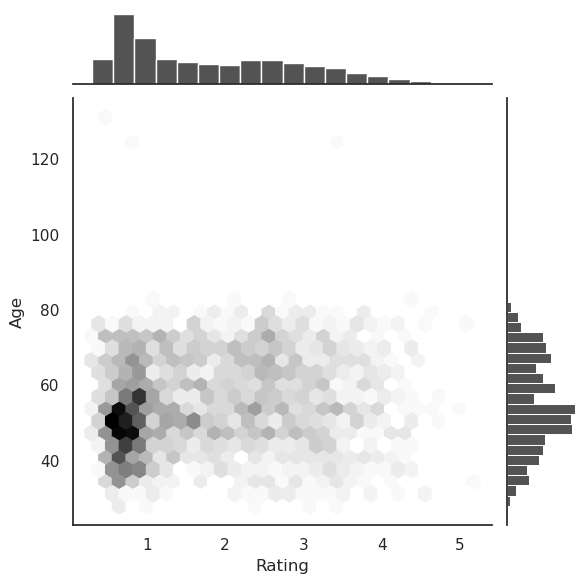

In [41]:
sns.jointplot(data=df_analysis, x="Rating", y="Age", kind="hex", color="k");

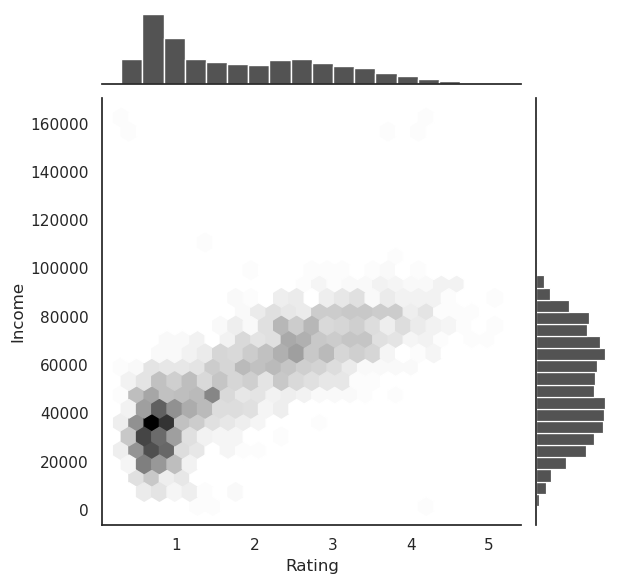

In [42]:
sns.jointplot(data=df_analysis.drop(df_analysis[df_analysis['Income']>400000].index), x="Rating", y="Income", kind="hex", color="k");

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

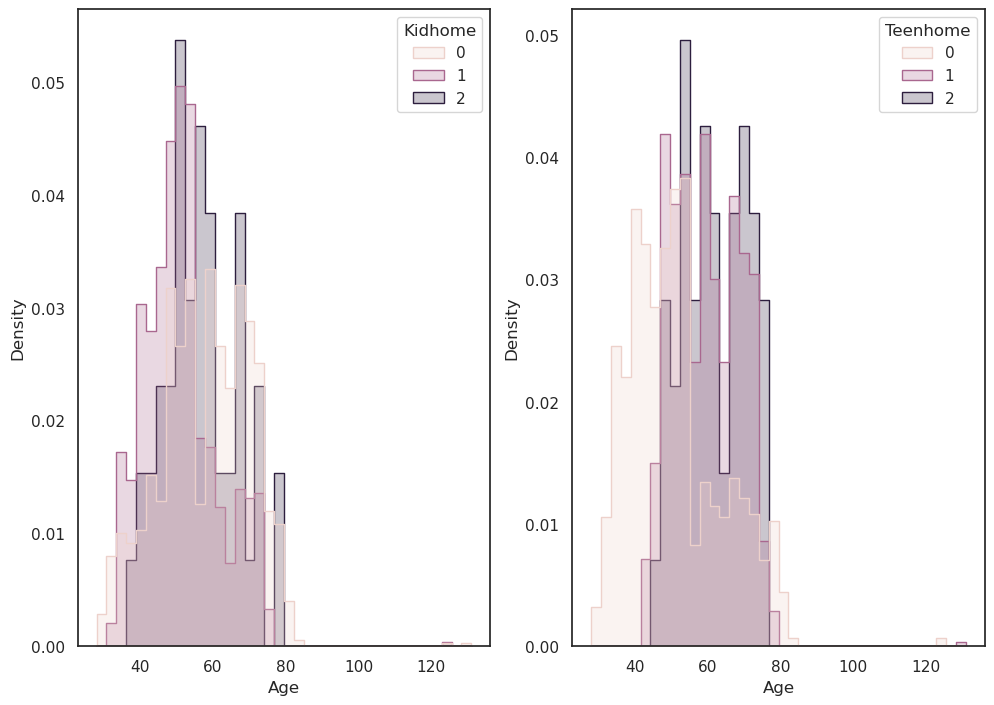

In [43]:
fig, ax = plt.subplots(1,2)
sns.histplot(data=df_analysis, x="Age", hue="Kidhome", element="step",
            stat="density", common_norm=False, ax=ax[0])
sns.histplot(data=df_analysis, x="Age", hue="Teenhome", element="step",
            stat="density", common_norm=False, ax=ax[1])
fig.show()

In [44]:
df_analysis['Childrenhome'] = df_analysis['Kidhome'] + df_analysis['Teenhome'] # общее количество детей

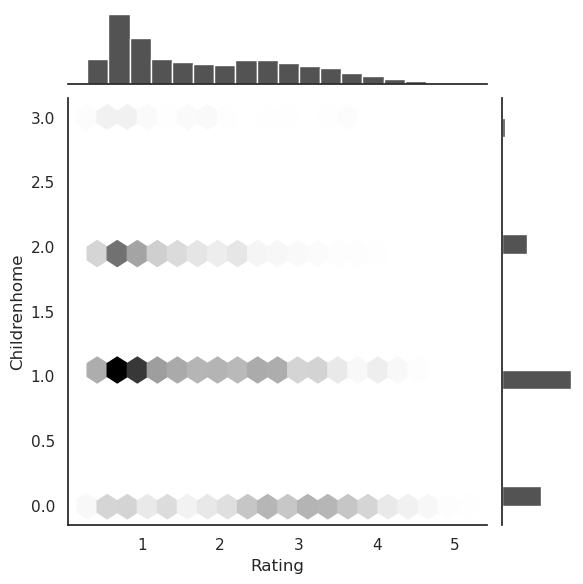

In [45]:
sns.jointplot(data=df_analysis, x="Rating", y="Childrenhome", kind="hex", color="k");

На основе графиков выше можно сделать вывод, что целевая аудитория - люди со средней покупательской способностью в возрасте от 40 до 60 лет, с доходом от 20000 до 40000 и одним несовершеннолетним в семье (чаще ребенок чем подросток). Их семейный статус (преимущественно): Single, Together, Married, Divorced. Образование (преимущественно): Graduation, Masters, PhD.